# Lab 04: Opérations géométriques et autres outils mathématiques

## Bibliothèques

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Définition des fonctions de plots

In [2]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

## Manipulations géometriques

### Scaling: échelonage

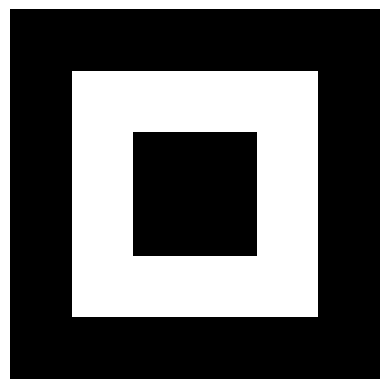

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [3]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap="gray")
plt.axis("off")
plt.show()
toy_image

**Nous deffinissons une matrice 6x6 puis nous clorons les pixels blancs puis les noirs**

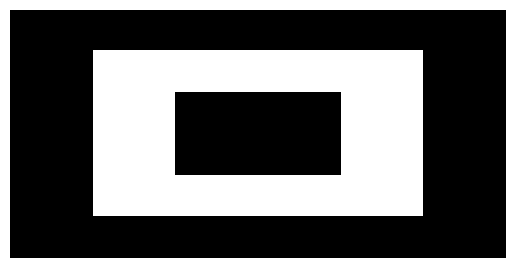

In [4]:
new_toy = cv2.resize(toy_image,None,fx=2,fy=1,interpolation=cv2.INTER_NEAREST)
plt.imshow(new_toy,cmap='gray')
plt.axis("off")
plt.show()

**Nous remarquons un réajustement (échelonage horizontal)**

La dim horizontal fait deux fois la taille de la dim verticale

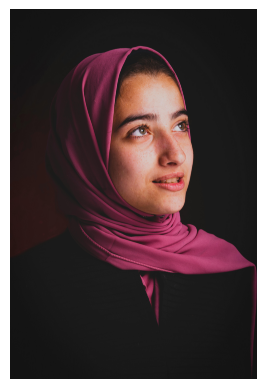

In [5]:
image = cv2.imread("image1.jpg")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

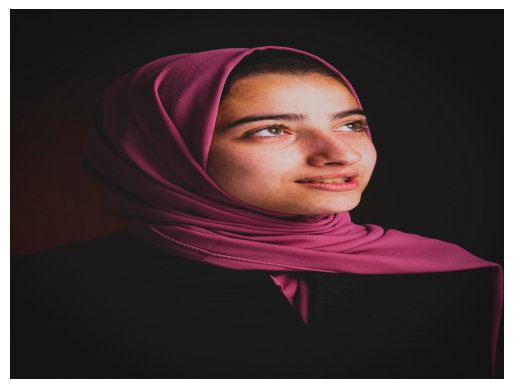

Old image shape (6016, 4016, 3) New Image shape (6016, 8032, 3)


In [6]:
new_image = cv2.resize(image,None,fx=2,fy=1,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
print("Old image shape",image.shape,"New Image shape",new_image.shape)

**On remarque la même distortion (horizontale)**

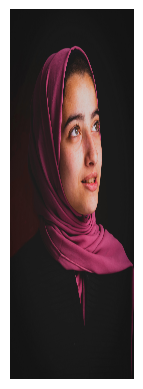

Old image shape (6016, 4016, 3) New Image shape (12032, 4016, 3)


In [7]:
new_image = cv2.resize(image,None,fx=1,fy=2,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
print("Old image shape",image.shape,"New Image shape",new_image.shape)

**L'image est distortionnée mais verticalement en effet la hauteur est 2 fois plus importante**

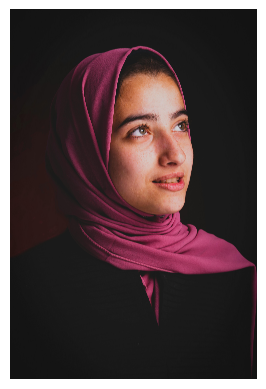

Old image shape (6016, 4016, 3) New Image shape (12032, 8032, 3)


In [8]:
new_image = cv2.resize(image,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
print("Old image shape",image.shape,"New Image shape",new_image.shape)

**La hauteur et la largeur font 2 fois plus grans mêmes si les proportions sont respectées**

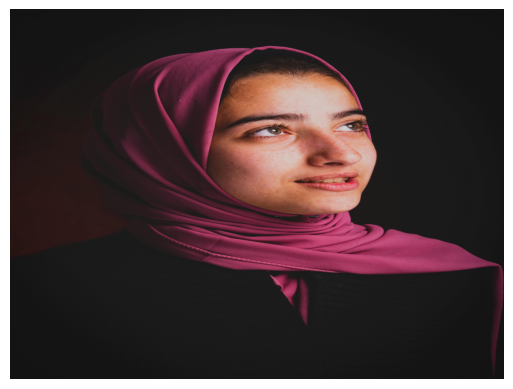

Old image shape (6016, 4016, 3) New Image shape (3008, 4016, 3)


In [9]:
new_image = cv2.resize(image,None,fx=1,fy=0.5,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
print("Old image shape",image.shape,"New Image shape",new_image.shape)

**Dans ce cas la distoryion est horizontale est divise la hauteur par 2**

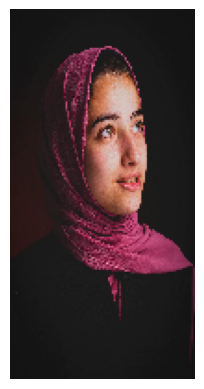

Old image shape (6016, 4016, 3) New Image shape (200, 100, 3)


In [10]:
rows = 100
cols = 200
new_image = cv2.resize(image,(rows,cols),interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
print("Old image shape",image.shape,"New Image shape",new_image.shape)

**Dans ce cas nous definissons la hauteur et la largeur desirées de notre image distordue**

### Translation

In [11]:
tx = 100
ty = 0
M = np.float32([[1,0,tx],[0,1,ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [12]:
rows, cols, _ = image.shape

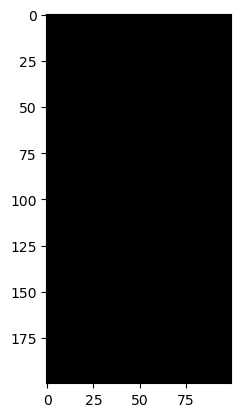

In [13]:
new_image = cv2.warpAffine(image,M,(100,200))
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

plt.show()

**C'est un crop de la partie en haut à gauche de l'image selon les axes**

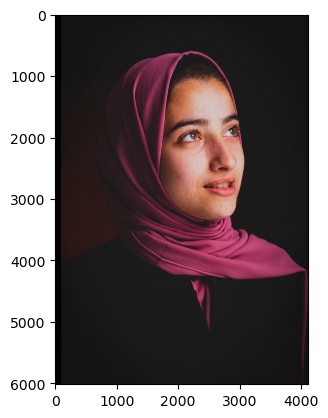

In [14]:
new_image = cv2.warpAffine(image,M,(cols + tx,rows + ty))
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

plt.show()

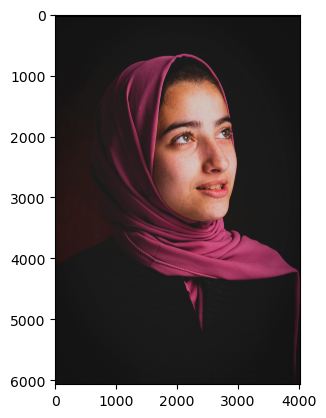

In [15]:
tx = 0
ty = 50
M = np.float32([[1,0,tx],[0,1,ty]])
new_image = cv2.warpAffine(image,M,(cols+tx,rows+ty))
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

**J'ai laissé les axes pour montrer la difference de tailles et des proportions des images il est clair que les tx agissent sur l'axe horizontal et les ty agissent sur les axes verticaux**


### Rotation 

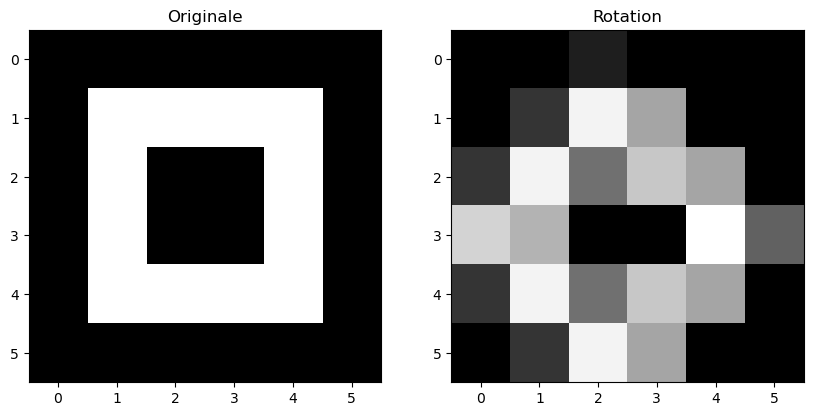

In [16]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3,3),angle=theta,scale=1)
new_toy_image = cv2.warpAffine(toy_image,M,(6,6))
plot_image(toy_image,new_toy_image,"Originale","Rotation")

**On prend un centre (3,3) à partir duquel nous avons appliqué une rotation d'un angle théta (45 degrès)**

In [17]:
cols, rows, _ = image.shape
image.shape

(6016, 4016, 3)

**Pour mon image elle a une largeur et longueur paire il faut diminuer 1 afin d'obtenir un centre ou "noyeau"**

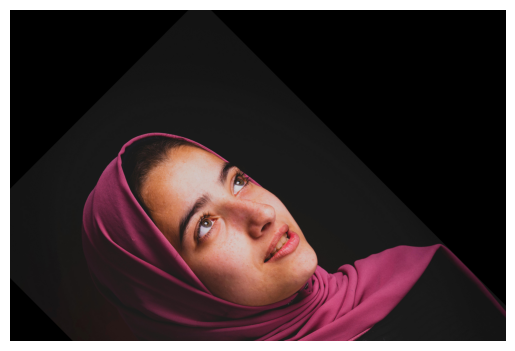

In [18]:
M = cv2.getRotationMatrix2D(center=(cols//2 - 1,rows //2 - 1),angle=theta,scale=1)
new_image = cv2.warpAffine(image,M,(cols,rows))
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

**La rotation est plus claire sur l'image**

## Operations mathematiques

### Opertaions vectorielles

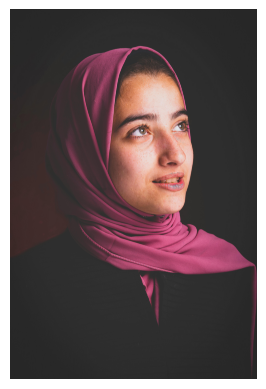

In [22]:
new_image = image + 20
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

**Ajoute 20 à l'intensité de chaque pixel**

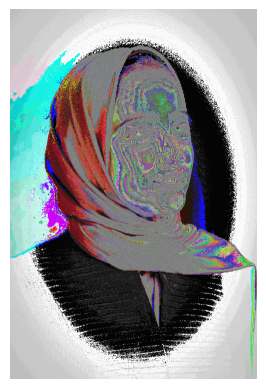

In [27]:
new_image = image * 10
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

**On peut multiplier l'intensité x10**

In [32]:
noise = np.random.normal(0,20,(cols,rows,3)).astype(np.uint8)
noise.shape

(6016, 4016, 3)

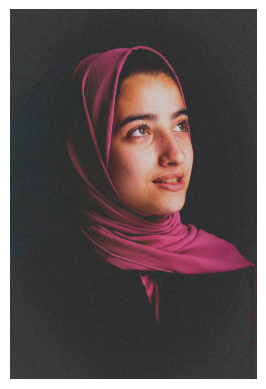

In [33]:
new_image = image + noise
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

**Nous pouvons par cette manière définir un bruit et l'ajouter à l'image de la même manière nous pouvons multiplier l'image par ce bruit (on remarque le changelent d'intensité)**

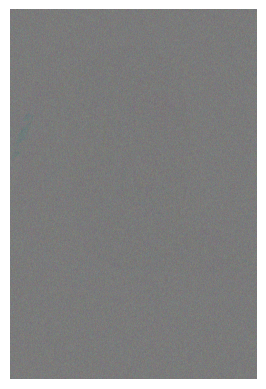

In [38]:
new_image = noise*image 
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Operations matricielles

(5702, 3915)


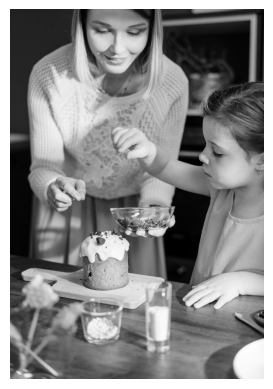

In [39]:
im_gray = cv2.imread("image4.jpg", cv2.IMREAD_GRAYSCALE)
print(im_gray.shape)
plt.imshow(im_gray, cmap='gray')
plt.axis("off")
plt.show()

**On affiche l'image en gis avec sa taille**

In [24]:
U, s, V = np.linalg.svd(im_gray,full_matrices=True) 

**On déclare les décompositions en matrices superieurs et inferieurs ainsi que diagonale à base des valeurs singulières**

In [25]:
s.shape

(3915,)

In [26]:
S = np.zeros((im_gray.shape[0],im_gray.shape[1]))
S[:image.shape[0],:image.shape[0]]= np.diag(s)

ValueError: could not broadcast input array from shape (3915,3915) into shape (5702,3915)

**On Declare une matrice de zeros de la taille de l'image** 

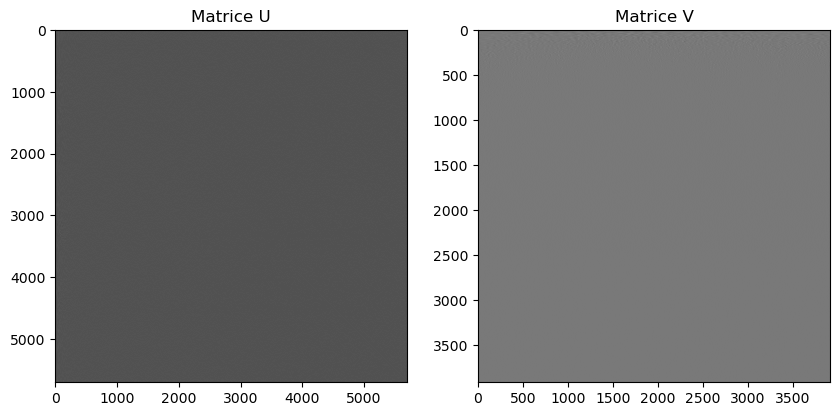

In [83]:
plot_image(U,V,"Matrice U","Matrice V")

**Chaque matricee represente une dimension au carré longueur² et largeur²**

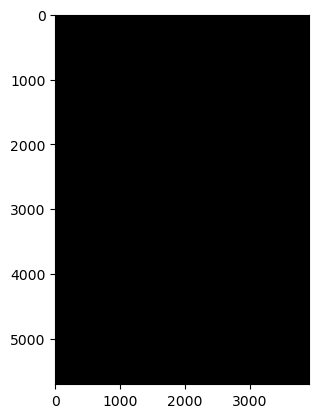

In [84]:
plt.imshow(S,cmap='gray')
plt.show()

**c'est la matrice diagonale qui va avoir la même taille que l'image originale**

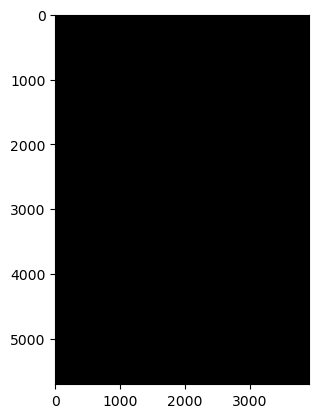

In [85]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

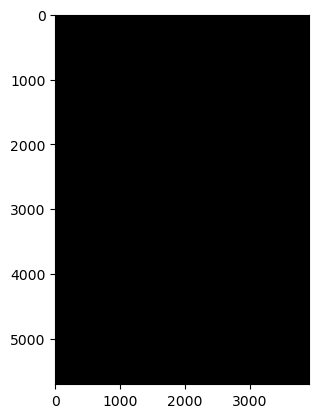

In [86]:
A = U.dot(B)
plt.imshow(A,cmap='gray')
plt.show()

**On calcul le produit point par point afin d'afficher le résultat des combinaison des 3 matrices**

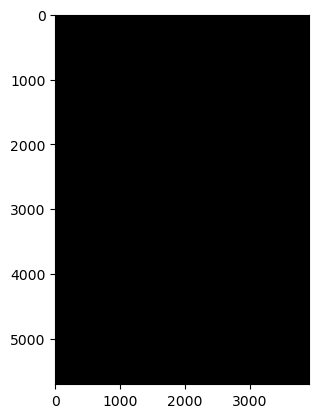

In [101]:
for n_component in [1,10,100,200,300,500]:
    S_new = S[:,:n_component]
    V_new = V[:n_component,:]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.show()